<a href="https://colab.research.google.com/github/jeet0474/Machine-Learning-Projects-2024/blob/main/Jeet__Patel_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASSIFICATION**

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
#For more information about the dataset visit: https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra
cancer_dataset = pd.read_csv('/content/sample_data/dataR2.csv')

In [97]:
cancer_dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [98]:
cancer_dataset.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


**Logistic Regression**

In [99]:
cancer_dataset['Classification'].unique()

array([1, 2])

In [100]:
cancer_dataset.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [101]:
# spliting into independent and dependent features

X = cancer_dataset.iloc[:,:-1]
y = cancer_dataset.iloc[:,-1]

In [102]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [103]:
y

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [105]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [106]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1', 'l2', 'elasticnet'],
             'C':[1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 60, 70, 80],
             'max_iter':[100, 200, 300]}

In [107]:
classifier_regressor = GridSearchCV(classifier, param_grid = parameter, scoring = 'accuracy', cv = 5)

In [108]:
classifier_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 60, 70,
                               80],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [109]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 300, 'penalty': 'l2'}


In [110]:
print(classifier_regressor.best_score_)

0.6686274509803922


In [111]:
# prediction
y_pred = classifier_regressor.predict(X_test)

In [112]:
# accuracy score
from sklearn.metrics import accuracy_score, classification_report

In [113]:
score = accuracy_score(y_pred, y_test)
print(score)

0.7586206896551724


In [114]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.79      0.73      0.76        15

    accuracy                           0.76        29
   macro avg       0.76      0.76      0.76        29
weighted avg       0.76      0.76      0.76        29



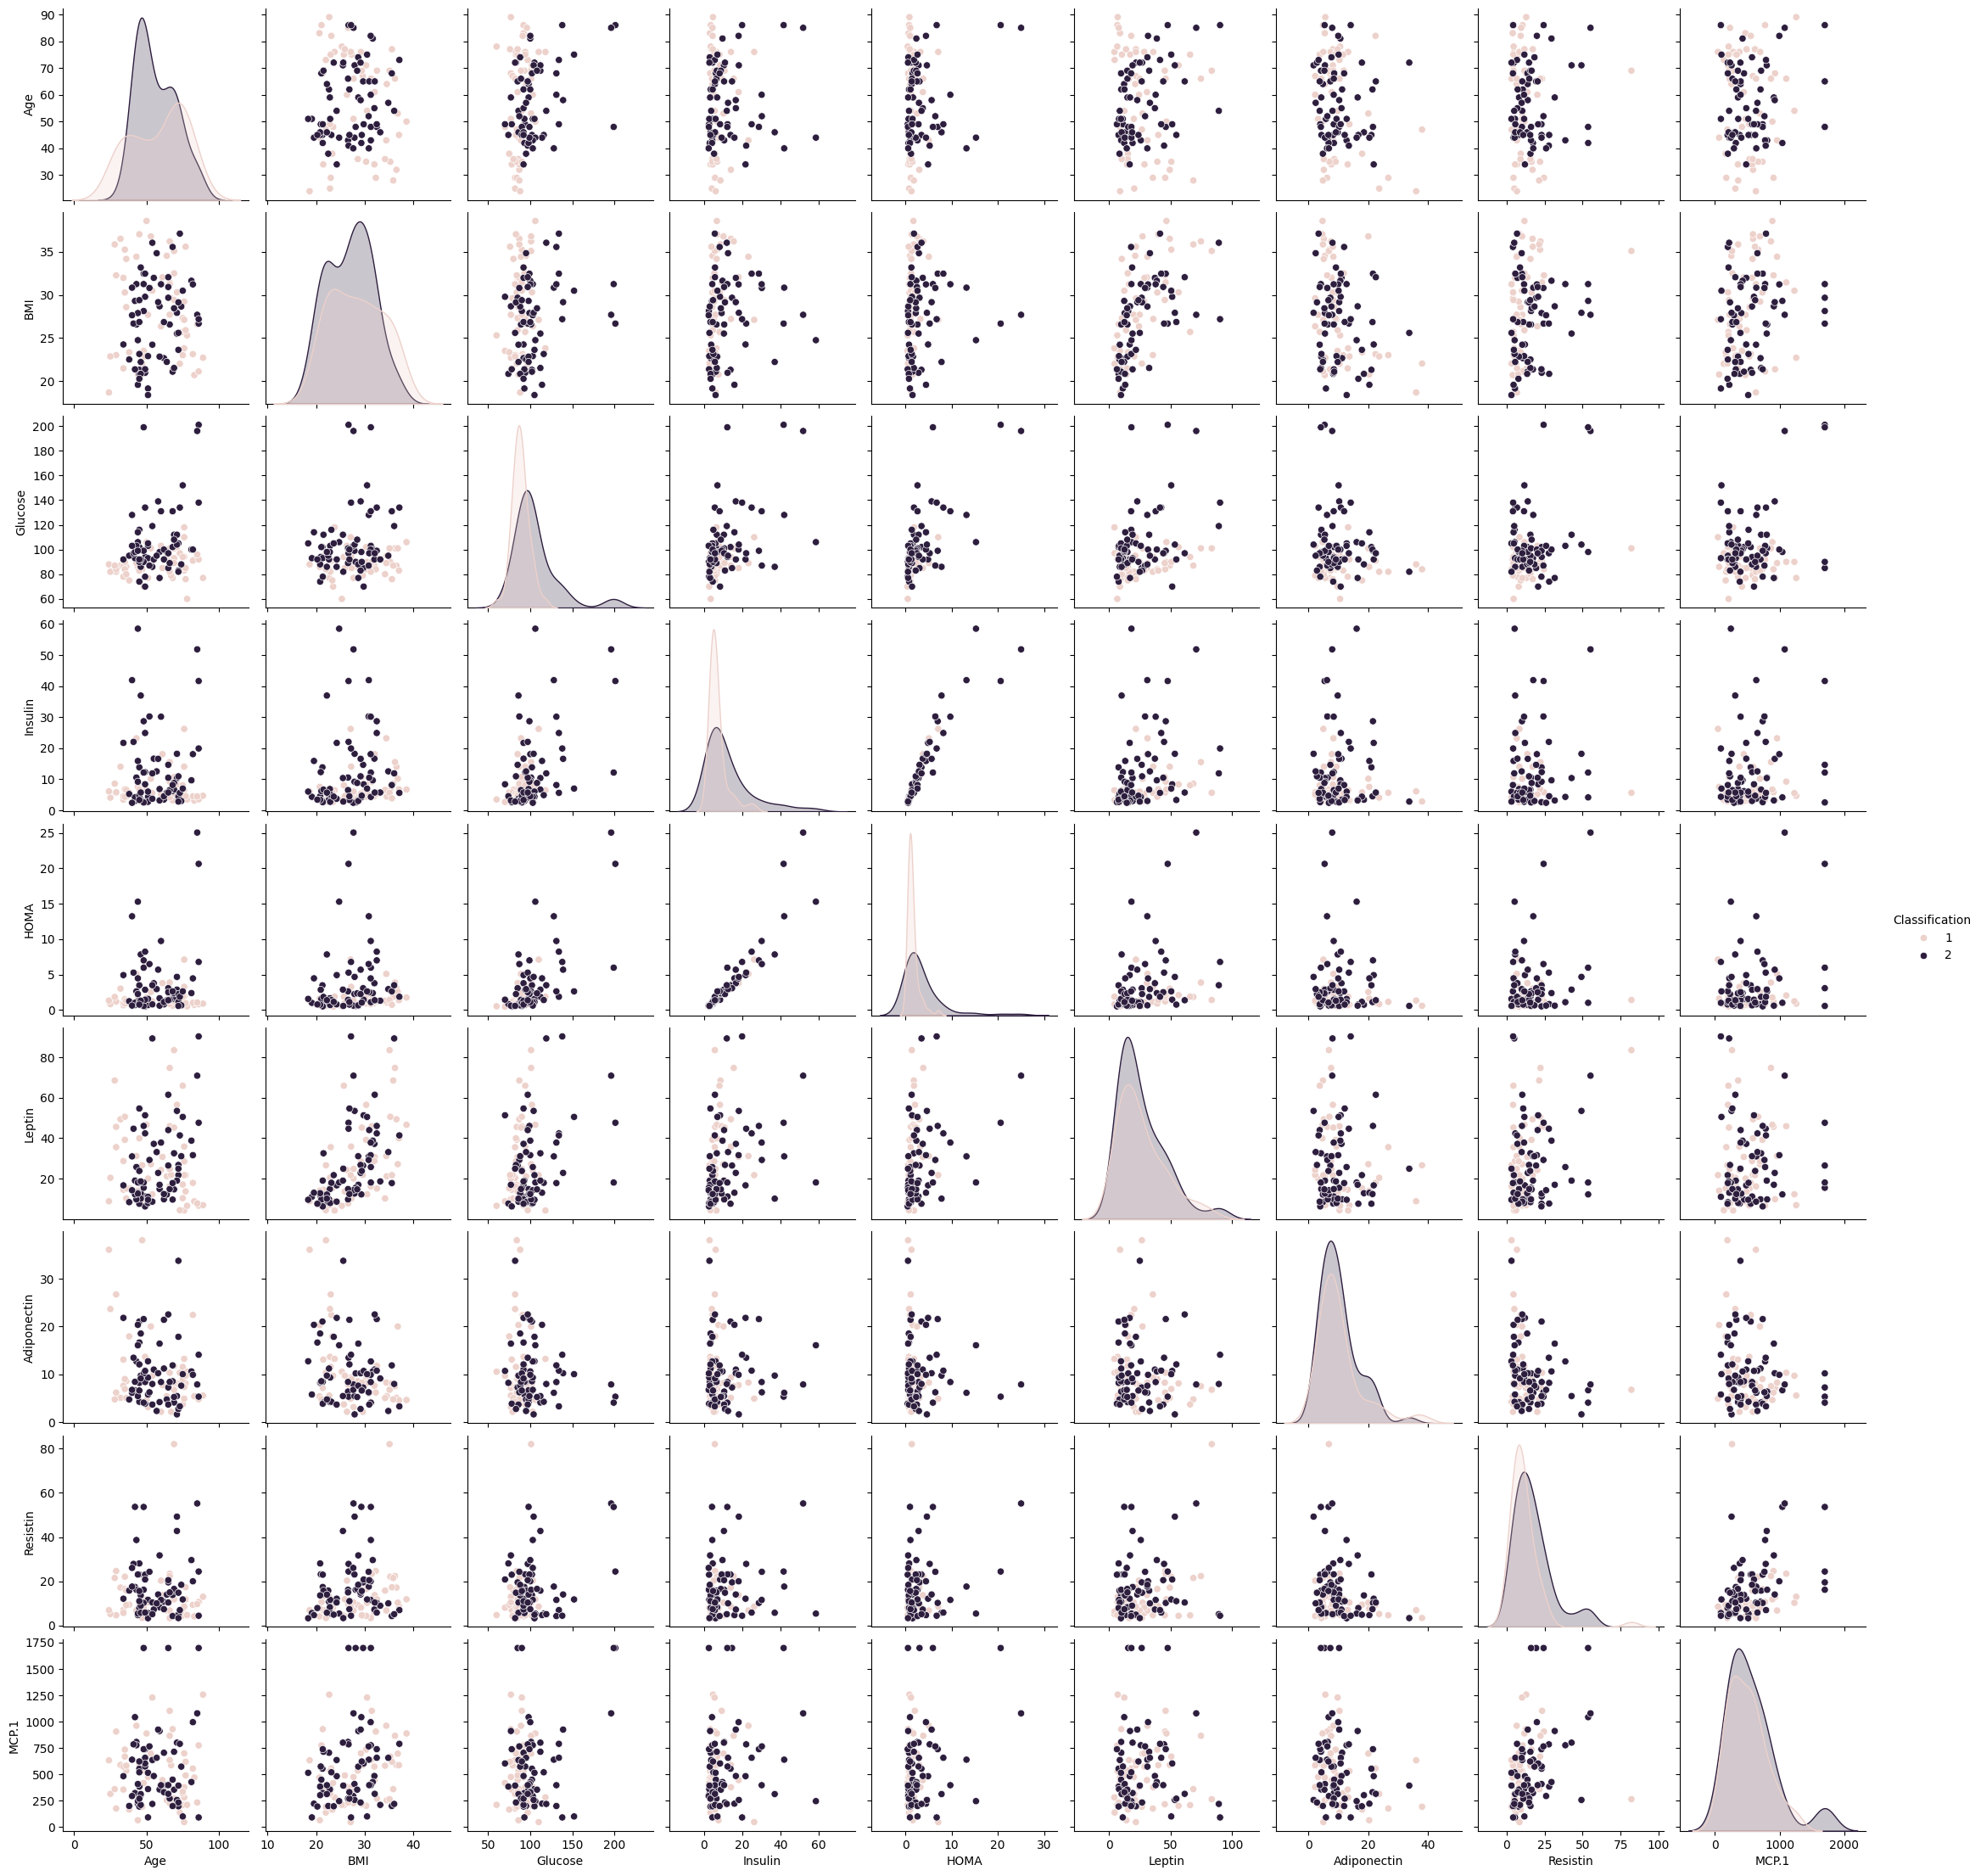

In [115]:
# EDA
sns.pairplot(cancer_dataset, hue = 'Classification')

**SVM(Support Vector Machines)**

In [116]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [117]:
from sklearn.svm import SVC
Classifier = SVC(kernel = 'linear', random_state = 0)
Classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [118]:
y_pred = Classifier.predict(X_test)

In [119]:
y_pred

array([2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 2])

In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [121]:
cm

array([[14,  1],
       [ 4, 10]])

<Axes: >

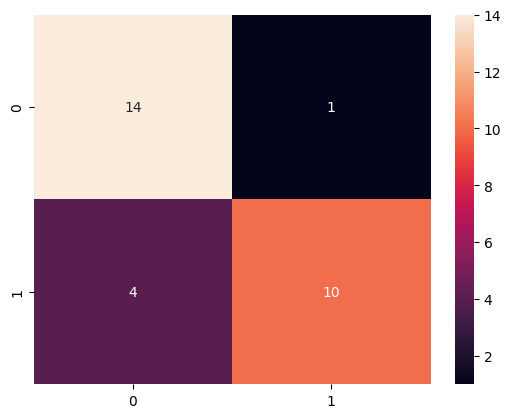

In [122]:
sns.heatmap(cm, annot = True)



---



# **LINEAR REGRESSION**

In [123]:
#For more information for the dataser refer: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set
real_estate_dataset = pd.read_excel('/content/sample_data/Real estate valuation data set.xlsx')

In [124]:
real_estate_dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [125]:
real_estate_dataset.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


In [126]:
real_estate_dataset.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [127]:
X = real_estate_dataset.drop('Y house price of unit area', axis = 1)
y = real_estate_dataset['Y house price of unit area']

In [128]:
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067


In [129]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [131]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [132]:
pd.DataFrame(model.coef_,X.columns,columns = ['coeficient'])

,coeficient
No,-0.006323
X1 transaction date,5.862600
X2 house age,-0.264504
X3 distance to the nearest MRT station,-0.005052
X4 number of convenience stores,1.119021
X5 latitude,216.455474
X6 longitude,-43.476711


In [133]:
y_pred = model.predict(X_test)

In [134]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}).head()

,y_test,y_pred
358,45.1,47.417526
350,42.3,40.694650
373,52.2,43.539069
399,37.3,39.359839
369,22.8,26.647957


In [135]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [136]:
MAE

5.957419605101628

In [137]:
MSE

68.07329456482202

In [138]:
RMSE

8.250654190112565

In [139]:
real_estate_dataset['Y house price of unit area'].mean()

37.980193236714975

In [140]:
test_residuals = y_test-y_pred

In [141]:
test_residuals

358    -2.317526
350     1.605350
373     8.660931
399    -2.059839
369    -3.847957
         ...    
63      6.028363
261    -5.401465
297    -5.005819
113   -36.968111
248    -8.428824
Name: Y house price of unit area, Length: 104, dtype: float64

<Axes: xlabel='Y house price of unit area'>

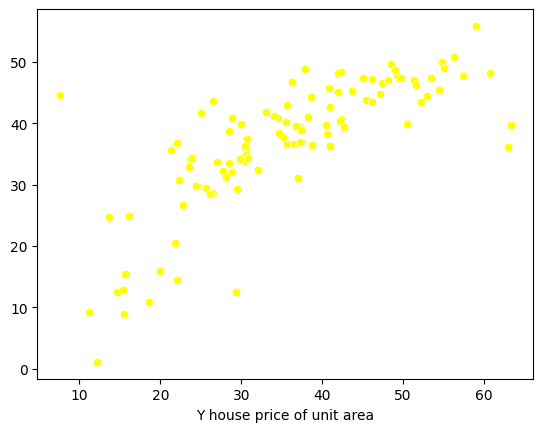

In [142]:
sns.scatterplot(x=y_test, y=y_pred, color='yellow')
#plt.axhline(y=30, color = 'blue',ls = '--')

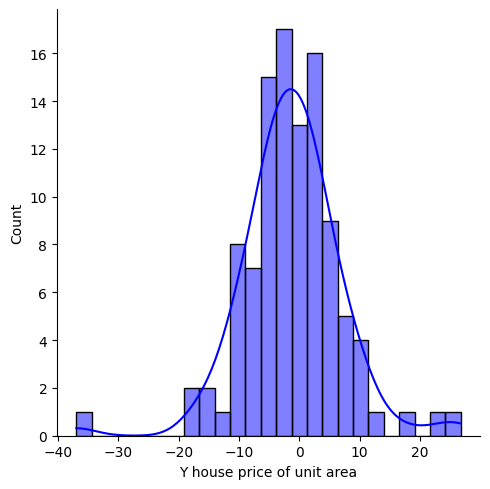

In [144]:
sns.displot(test_residuals, bins = 25, kde = True, color = 'blue')